# Discovering data

In [1]:
#Imports
import numpy as np
import pandas as pd
from pandas import DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Home Loan Train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.shape

(614, 13)

In [7]:
df_HL = df.copy()

# Cleaning data

### Removing outlier values

<AxesSubplot:xlabel='ApplicantIncome'>

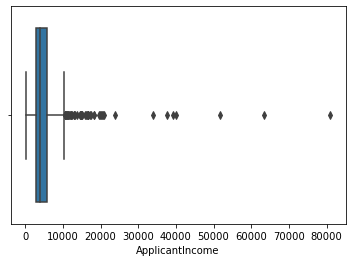

In [8]:
sns.boxplot(x=df_HL['ApplicantIncome'])

In [9]:
filterAI = df_HL['ApplicantIncome'].values < 7400
df_HL = df_HL[filterAI]

<AxesSubplot:xlabel='ApplicantIncome'>

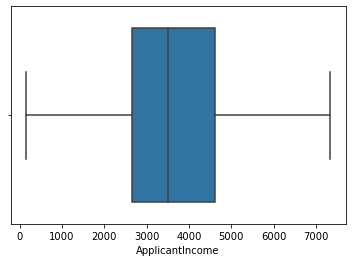

In [10]:
sns.boxplot(x=df_HL['ApplicantIncome'])

In [11]:
len(df_HL['ApplicantIncome'])

519

<AxesSubplot:xlabel='CoapplicantIncome'>

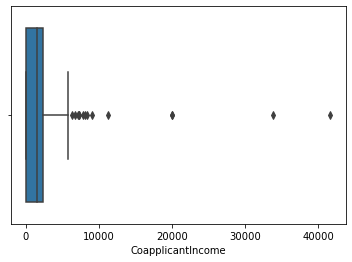

In [12]:
sns.boxplot(x=df_HL['CoapplicantIncome'])

In [13]:
filterCAI = df_HL['CoapplicantIncome'].values < 6000
df_HL = df_HL[filterCAI]

<AxesSubplot:xlabel='CoapplicantIncome'>

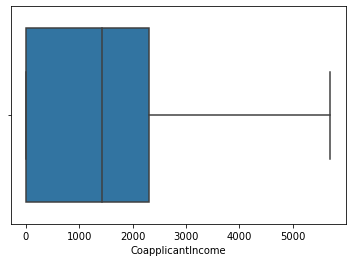

In [14]:
sns.boxplot(x=df_HL['CoapplicantIncome'])

In [15]:
len(df_HL['CoapplicantIncome'])

505

<AxesSubplot:xlabel='LoanAmount'>

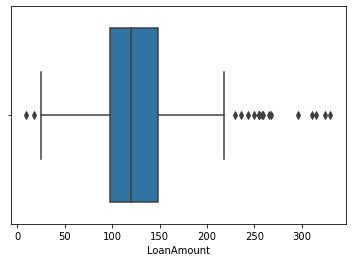

In [16]:
sns.boxplot(x=df_HL['LoanAmount'])

In [47]:
filterLA1 = df_HL['LoanAmount'].values < 210
filterLA2 = df_HL['LoanAmount'].values > 30
df_HL = df_HL[filterLA1]
df_HL = df_HL[filterLA2]

<AxesSubplot:xlabel='LoanAmount'>

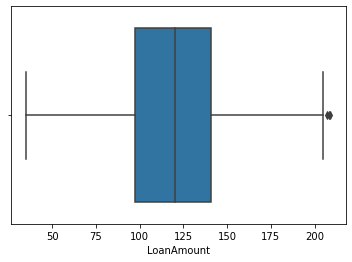

In [48]:
sns.boxplot(x=df_HL['LoanAmount'])

In [49]:
len(df_HL['LoanAmount'])

459

In [50]:
df_HL.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,459.000000,459.000000,459.000000,446.000000,421.000000
mean,3676.912854,1352.738388,119.978214,343.721973,0.836105
std,1333.314960,1387.168611,36.137770,66.081011,0.370621
min,150.000000,0.000000,35.000000,12.000000,0.000000
25%,2688.500000,0.000000,97.500000,360.000000,1.000000
50%,3450.000000,1400.000000,120.000000,360.000000,1.000000
75%,4550.500000,2227.500000,141.000000,360.000000,1.000000
max,7333.000000,5701.000000,209.000000,480.000000,1.000000


In [51]:
df_HL.shape

(459, 13)

### Replacing missing values 

In [52]:
#Count null values
df_HL.isnull().sum()

Loan_ID               0
Gender                8
Married               2
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     13
Credit_History       38
Property_Area         0
Loan_Status           0
dtype: int64

#### For object variables, they are replaced by mode (mode : dominant value in column)
#### For numrique variables (int, float...), they are replaced by mean or median

In [53]:
df_HL.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
df_HL['Gender'].fillna(df_HL['Gender'].mode()[0],inplace=True)
df_HL['Married'].fillna(df_HL['Married'].mode()[0],inplace=True)
df_HL['Dependents'].fillna(df_HL['Dependents'].mode()[0],inplace=True)
df_HL['Self_Employed'].fillna(df_HL['Self_Employed'].mode()[0],inplace=True)
df_HL['Credit_History'].fillna(df_HL['Credit_History'].mode()[0],inplace=True)

In [55]:
df_HL['LoanAmount'].fillna(df_HL['LoanAmount'].median(),inplace=True)
df_HL['Loan_Amount_Term'].fillna(df_HL['Loan_Amount_Term'].median(),inplace=True)

In [56]:
df_HL.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization

## Univariate Analysis : studying variables independently 

### Taget variable : Loan status

In [57]:
df_HL['Loan_Status'].value_counts()

Y    320
N    139
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan Status'}>

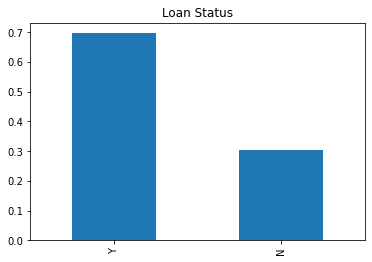

In [58]:
df_HL['Loan_Status'].value_counts(normalize=True).plot.bar(title="Loan Status") #normalize : show value as %

### Object variables

In [59]:
df_HL['Gender'].value_counts()

Male      369
Female     90
Name: Gender, dtype: int64

In [60]:
df_HL['Married'].value_counts()

Yes    292
No     167
Name: Married, dtype: int64

In [61]:
df_HL['Self_Employed'].value_counts()

No     410
Yes     49
Name: Self_Employed, dtype: int64

<AxesSubplot:title={'center':'Loan granted based on Situation'}>

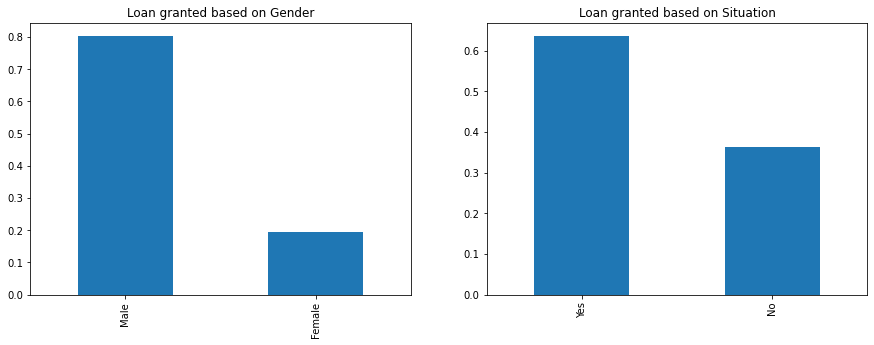

In [62]:
plt.figure(1)

plt.subplot(121)
df_HL['Gender'].value_counts(normalize=True).plot.bar(title="Loan granted based on Gender", figsize=(15,5))

plt.subplot(122)
df_HL['Married'].value_counts(normalize=True).plot.bar(title="Loan granted based on Situation", figsize=(15,5))

In [63]:
df_HL['Self_Employed'].value_counts()

No     410
Yes     49
Name: Self_Employed, dtype: int64

In [64]:
df_HL['Dependents'].value_counts()

0     283
2      74
1      69
3+     33
Name: Dependents, dtype: int64

<AxesSubplot:title={'center':'Loan granted based on Dependents'}>

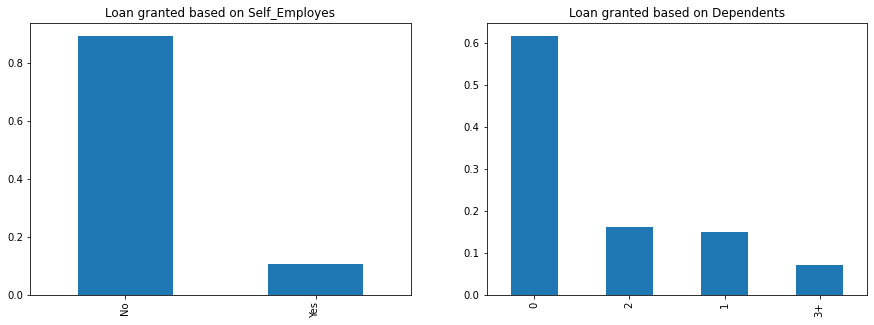

In [65]:
plt.figure(2)

plt.subplot(121)
df_HL['Self_Employed'].value_counts(normalize=True).plot.bar(title="Loan granted based on Self_Employes", figsize=(15,5))

plt.subplot(122)
df_HL['Dependents'].value_counts(normalize=True).plot.bar(title="Loan granted based on Dependents", figsize=(15,5))

## Bivariate analysis : studying relation between variables and target

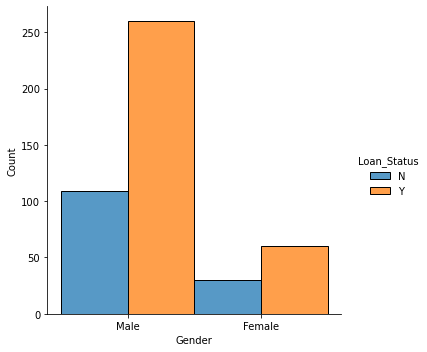

In [66]:
sns.displot(data=df_HL, x="Gender", hue="Loan_Status", multiple="dodge")

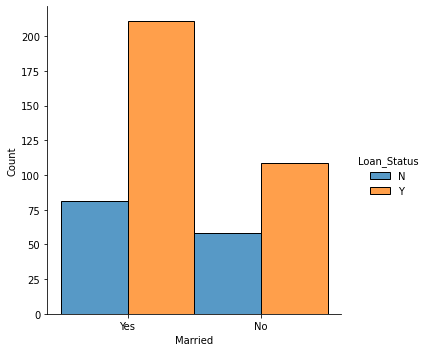

In [67]:
sns.displot(data=df_HL, x="Married", hue="Loan_Status", multiple="dodge")

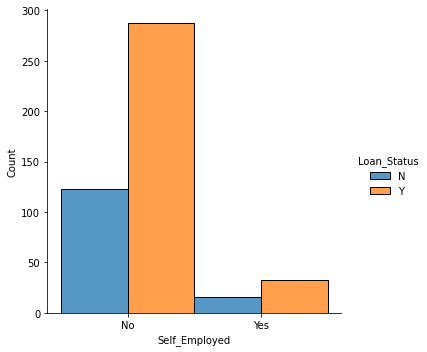

In [68]:
sns.displot(data=df_HL, x="Self_Employed", hue="Loan_Status", multiple="dodge")

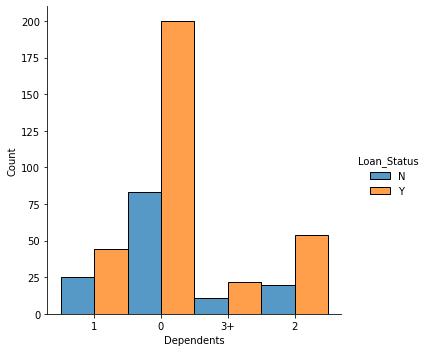

In [69]:
sns.displot(data=df_HL, x="Dependents", hue="Loan_Status", multiple="dodge")

### Correlation Matrix 

<AxesSubplot:>

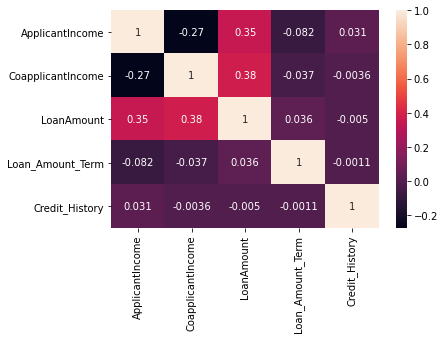

In [70]:
mat = df_HL.corr()
sns.heatmap(mat,annot = True)

# Normalizating the data

## Object variables

In [71]:
frame = { 'Gender': df_HL['Gender'] , 'Married': df_HL['Married'] , 'Dependents': df_HL['Dependents'] , 'Education': df_HL['Education'] , 'Self_Employed': df_HL['Self_Employed'] ,'Property_Area': df_HL['Property_Area'] , 'Loan_Status': df_HL['Loan_Status'] }
df_HL_Ob = DataFrame(frame)

In [72]:
df_HL_Ob.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
6,Male,Yes,0,Not Graduate,No,Urban,Y


In [73]:
df_HL_Ob = pd.get_dummies(df_HL_Ob, drop_first=True)

In [74]:
df_HL_Ob.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,1,0,0,1,1


In [75]:
df_HL_Ob.drop('Property_Area_Semiurban', inplace=True, axis=1)

In [76]:
df_HL_Ob.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Urban,Loan_Status_Y
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,1,1
3,1,1,0,0,0,1,0,1,1
4,1,0,0,0,0,0,0,1,1
6,1,1,0,0,0,1,0,1,1


## Target, other variables : The min-max feature scaling

In [77]:
frame = { 'ApplicantIncome': df_HL['ApplicantIncome'] , 'CoapplicantIncome': df_HL['CoapplicantIncome'] , 'LoanAmount': df_HL['LoanAmount'] , 'Loan_Amount_Term': df_HL['Loan_Amount_Term'] , 'Credit_History' : df_HL['Credit_History'] }
df_HL_Tov = DataFrame(frame)

In [78]:
df_HL_Tov.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
6,2333,1516.0,95.0,360.0,1.0


In [81]:
# Min-Max feature scalling
for column in df_HL_Tov.columns:
    df_HL_Tov[column] = (df_HL_Tov[column] - df_HL_Tov[column].min()) / (df_HL_Tov[column].max() - df_HL_Tov[column].min())

In [82]:
df_HL_Tov.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,0.617152,0.264515,0.534483,0.74359,1.0
2,0.396770,0.000000,0.178161,0.74359,1.0
3,0.338716,0.413612,0.488506,0.74359,1.0
4,0.814423,0.000000,0.609195,0.74359,1.0
6,0.303912,0.265918,0.344828,0.74359,1.0


In [83]:
df_final = pd.concat([df_HL_Ob, df_HL_Tov], axis=1)

In [84]:
df_final.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,1,1,1,0,0,0,0,0,0,0.617152,0.264515,0.534483,0.74359,1.0
2,1,1,0,0,0,0,1,1,1,0.396770,0.000000,0.178161,0.74359,1.0
3,1,1,0,0,0,1,0,1,1,0.338716,0.413612,0.488506,0.74359,1.0
4,1,0,0,0,0,0,0,1,1,0.814423,0.000000,0.609195,0.74359,1.0
6,1,1,0,0,0,1,0,1,1,0.303912,0.265918,0.344828,0.74359,1.0


# Building, training the model

In [85]:
Y = df_final['Loan_Status_Y']
X = df_final.drop('Loan_Status_Y', axis=1)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [106]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [107]:
model = LogisticRegression()

In [108]:
model.fit(X_train,Y_train)

LogisticRegression()

In [109]:
Y_Prediction = model.predict(X_test)

In [110]:
score = accuracy_score(Y_test ,Y_Prediction)
score

0.8369565217391305

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status_Y'>

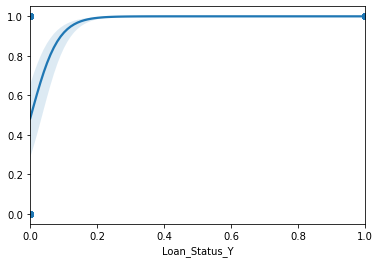

In [111]:
sns.regplot(Y_test, Y_Prediction, logistic=True)

In [112]:
import pickle

In [113]:
pickle.dump(model, open('Home_Loan_Prediction.pkl','wb'))